<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/topics/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks (CNNs)

### Overview

Convolutional Neural Networks (CNNs) are a class of deep learning models specifically designed for processing and analyzing image data. They are particularly effective for tasks like image classification, object detection, and segmentation due to their ability to automatically and adaptively learn spatial hierarchies of features.

### Key Components

1. **Convolutional Layers**:
   - **Purpose**: Extract features from the input image using filters (kernels) that slide over the image.
   - **Operation**: Each filter produces a feature map that highlights specific patterns such as edges, textures, or shapes.
   - **Kernel Size**: Defines the dimensions of the filter (e.g., 3x3, 5x5).

2. **Activation Functions**:
   - **Purpose**: Introduce non-linearity into the model, allowing it to learn complex patterns.
   - **Common Functions**: ReLU (Rectified Linear Unit) is the most commonly used activation function in CNNs. It replaces negative values with zero and retains positive values.

3. **Pooling Layers**:
   - **Purpose**: Reduce the spatial dimensions (height and width) of the feature maps while retaining important features.
   - **Types**:
     - **Max Pooling**: Takes the maximum value from each window of the feature map.
     - **Average Pooling**: Computes the average value from each window of the feature map.
   - **Pooling Size**: Common sizes are 2x2 or 3x3.

4. **Flattening**:
   - **Purpose**: Convert the 2D feature maps into a 1D vector.
   - **Usage**: This step prepares the data to be fed into fully connected (dense) layers.

5. **Fully Connected Layers (Dense Layers)**:
   - **Purpose**: Perform classification or regression based on the features extracted by the convolutional and pooling layers.
   - **Operation**: Each neuron in a fully connected layer is connected to every neuron in the previous layer.

6. **Output Layer**:
   - **Purpose**: Produce the final predictions of the network.
   - **Activation Function**: Softmax is commonly used for classification tasks to output probabilities for each class.

### How CNNs Work

1. **Feature Extraction**:
   - CNNs start with convolutional layers that apply multiple filters to the input image, extracting various features from different regions.

2. **Feature Hierarchy**:
   - As the network depth increases, higher-level convolutional layers capture more complex and abstract features from the input data.

3. **Dimensionality Reduction**:
   - Pooling layers reduce the size of feature maps, which helps in decreasing the computational load and preventing overfitting.

4. **Classification**:
   - The flattened feature maps are fed into fully connected layers, which combine the features to make final predictions.

### Applications

- **Image Classification**: Categorizing images into predefined classes (e.g., recognizing objects in photos).
- **Object Detection**: Identifying and locating objects within an image.
- **Image Segmentation**: Dividing an image into segments or regions based on certain features.

### Summary

CNNs are powerful models for image-related tasks due to their ability to automatically learn spatial hierarchies of features. By using convolutional and pooling layers, they efficiently process images and reduce dimensionality, enabling accurate and robust predictions.



In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
def plot_img(img):
  plt.figure(figsize=(3,3))
  plt.imshow(img)
  plt.show()

## Understanding `Conv2D` in TensorFlow

### Overview

The `Conv2D` layer in TensorFlow's Keras API is used to apply 2D convolutional operations to input data. Convolutional layers are fundamental components in Convolutional Neural Networks (CNNs) and are primarily used for feature extraction from image data.

### Key Concepts

- **Kernel (Filter)**: A small matrix used to slide over the input image to produce a feature map. Each kernel detects specific features like edges, textures, or patterns.
- **Stride**: The number of pixels by which the kernel moves across the input image. A stride of 1 means the kernel moves one pixel at a time.
- **Padding**: The process of adding extra pixels around the border of the input image to control the spatial dimensions of the output feature map. Padding can be 'valid' (no padding) or 'same' (padding added to keep output dimensions the same as input).
- **Activation Function**: A function applied to each element of the feature map to introduce non-linearity. Common activation functions include ReLU (Rectified Linear Unit).

### Syntax

```python
tf.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', activation=None, input_shape=None)


In [ ]:
# Set the seed for reproducibility
tf.random.set_seed(42)
# Generate a random tensor with shape (4, 6, 6, 128) with integer values
x_int = tf.random.uniform((4, 6, 6, 128), minval=100, maxval=255, dtype=tf.int32)
# Cast the tensor to float32
x = tf.cast(x_int, dtype=tf.float32)
# Define a Conv2D layer
conv_layer = layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='valid')
# Apply the convolutional layer to the input tensor
y = conv_layer(x)

In [ ]:
x

<tf.Tensor: shape=(4, 6, 6, 128), dtype=float32, numpy=
array([[[[222., 169., 196., ..., 192., 115., 175.],
         [214., 113., 144., ..., 172., 201., 205.],
         [200., 221., 163., ..., 126., 117., 173.],
         [249., 220., 139., ..., 219., 104., 133.],
         [253., 156., 251., ..., 201., 195., 102.],
         [212., 174., 214., ..., 125., 235., 153.]],

        [[148., 206., 150., ..., 164., 229., 253.],
         [104., 129., 131., ..., 185., 241., 253.],
         [243., 192., 116., ..., 224., 180., 198.],
         [244., 219., 183., ..., 160., 210., 203.],
         [203., 208., 235., ..., 223., 219., 173.],
         [192., 100., 187., ..., 236., 117., 138.]],

        [[228., 251., 171., ..., 154., 151., 126.],
         [198., 241., 128., ..., 202., 185., 241.],
         [197., 149., 146., ..., 180., 122., 162.],
         [174., 245., 138., ..., 250., 114., 179.],
         [201., 250., 238., ..., 142., 200., 207.],
         [254., 203., 131., ..., 217., 164., 141.]],

  

In [ ]:
y

<tf.Tensor: shape=(4, 4, 4, 3), dtype=float32, numpy=
array([[[[  0.      , 113.12576 , 150.97942 ],
         [  0.      ,   9.653439, 172.39929 ],
         [  0.      ,  17.841572, 400.65973 ],
         [  0.      ,   0.      , 253.7616  ]],

        [[  0.      , 116.28502 , 211.20547 ],
         [  0.      , 110.88809 , 214.18555 ],
         [  0.      , 174.45866 , 293.692   ],
         [  0.      , 145.87065 , 284.35193 ]],

        [[  0.      ,  50.24769 , 290.54474 ],
         [  0.      , 184.57481 , 208.56923 ],
         [  0.      ,  53.51848 , 362.59326 ],
         [  0.      , 122.79857 , 188.56139 ]],

        [[  0.      , 163.024   , 148.20406 ],
         [  0.      , 227.07117 , 215.54295 ],
         [  0.      , 125.941795, 139.61604 ],
         [  0.      ,  16.592146, 239.76776 ]]],


       [[[  0.      ,  24.045738, 241.94666 ],
         [  0.      ,  73.02252 , 322.18124 ],
         [  0.      , 115.32986 , 290.56653 ],
         [  0.      , 111.931595, 200.15582

In [ ]:
print("Input tensor shape:", x.shape)
print("Output tensor shape:", y.shape)

Input tensor shape: (4, 6, 6, 128)
Output tensor shape: (4, 4, 4, 3)


In [ ]:
x_np = x.numpy()[0, :, :, 0]  # Take the first image and first channel
y_np = y.numpy()[0, :, :, :]

x_np.shape , y_np.shape

((6, 6), (4, 4, 3))

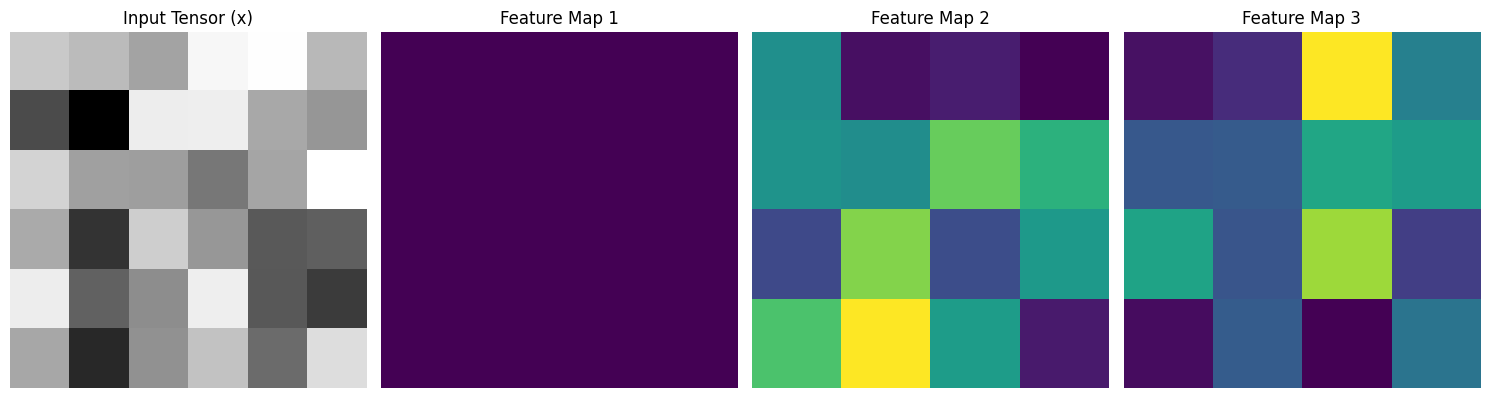

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot input tensor
axes[0].imshow(x_np, cmap='gray')
axes[0].set_title('Input Tensor (x)')
axes[0].axis('off')

# Plot each channel of the output tensor
for i in range(y_np.shape[-1]):
    axes[i + 1].imshow(y_np[:, :, i], cmap='viridis')
    axes[i + 1].set_title(f'Feature Map {i+1}')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img1 = Image.open("/content/test1img.png").convert('L') # source > repo/src/
img1 = img1.resize((60,60))

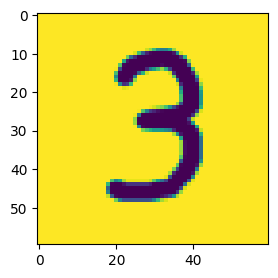

In [ ]:
plot_img(img1)

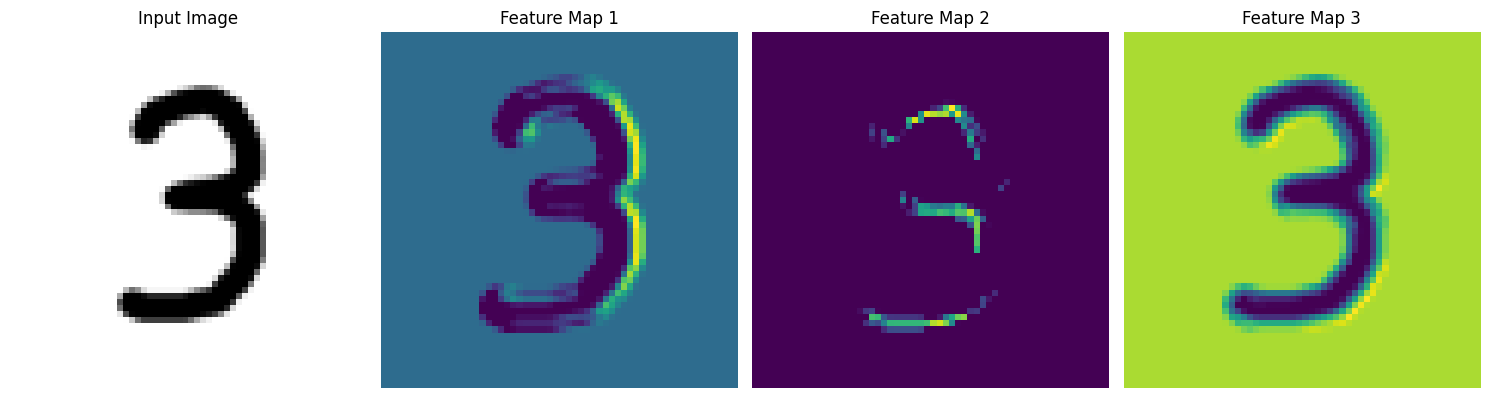

In [ ]:
# Convert image to numpy array and normalize pixel values
img_np = np.array(img1, dtype=np.float32) / 255.0  # Normalizing to [0, 1]
img_np = img_np[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions

# Convert to TensorFlow tensor
x = tf.convert_to_tensor(img_np)

# Define a Conv2D layer
conv_layer = layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='valid')

# Apply the convolutional layer to the input tensor
y = conv_layer(x)

# Convert tensors to numpy arrays for plotting
x_np = x.numpy().squeeze()  # Remove batch dimension and channel dimension
y_np = y.numpy().squeeze()  # Remove batch dimension

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot input image
axes[0].imshow(x_np, cmap='gray')
axes[0].set_title('Input Image')
axes[0].axis('off')

# Plot each channel of the output feature maps
for i in range(y_np.shape[-1]):
    axes[i + 1].imshow(y_np[:, :, i], cmap='viridis')
    axes[i + 1].set_title(f'Feature Map {i+1}')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

## MaxPool2D

`MaxPool2D` is a pooling layer used in Convolutional Neural Networks (CNNs) to down-sample the spatial dimensions of the input feature maps. It helps reduce the computational load and the number of parameters in the network, while also providing some degree of translation invariance.

### Key Points

- **Purpose**: Reduces the dimensionality of feature maps by retaining only the maximum value within a specified window, which helps in making the model more robust to small translations and distortions.

- **Parameters**:
  - `pool_size`: The size of the window (height, width) over which the maximum value is computed.
  - `strides`: The step size with which the pooling window moves across the input. Default is equal to `pool_size`.
  - `padding`: Can be 'valid' (no padding) or 'same' (pads the input to keep the output size the same as the input).

### Example

```python
from tensorflow.keras.layers import MaxPool2D

# Define a MaxPool2D layer
maxpool_layer = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

# Apply the MaxPool2D layer to a 4D tensor
output = maxpool_layer(input_tensor)


![img](https://img-blog.csdnimg.cn/img_convert/4c63d27cee5fb55308d7d535b9c74b2c.png)

In [ ]:
x = np.array([
    [1, 3, 2, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

x.shape

(4, 4)

In [ ]:
x

array([[ 1,  3,  2,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [ ]:
x = tf.reshape(x, (1, 4, 4, 1))
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=int64, numpy=
array([[[[ 1],
         [ 3],
         [ 2],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8]],

        [[ 9],
         [10],
         [11],
         [12]],

        [[13],
         [14],
         [15],
         [16]]]])>

In [ ]:
# Define MaxPool2D layer
maxpool_layer = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid')

# Apply the MaxPool2D layer
y = maxpool_layer(x)

# Convert result to numpy array
y_np = y.numpy().squeeze()  # Remove batch and channel dimensions

print("Input Tensor:\n", x.numpy().squeeze())
print("Output Tensor:\n", y_np)

Input Tensor:
 [[ 1  3  2  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Output Tensor:
 [[ 6  8]
 [14 16]]


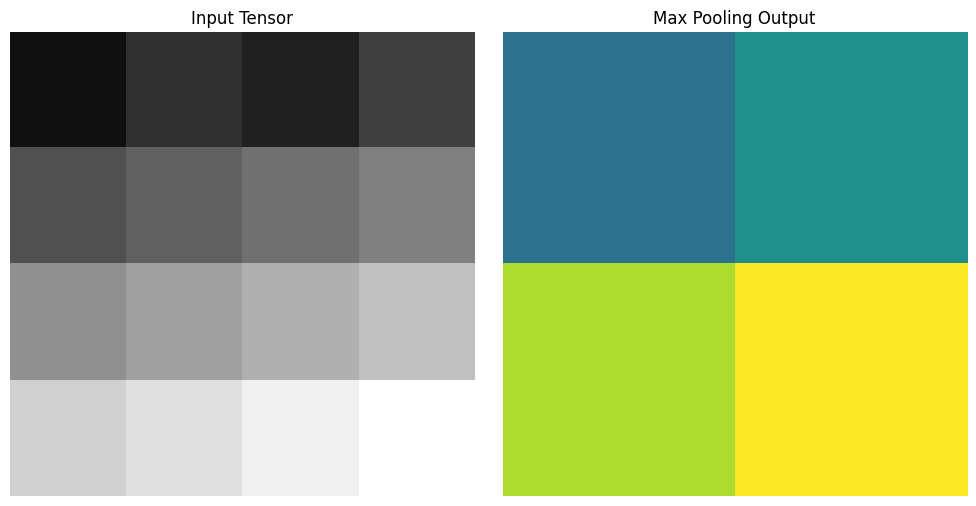

In [ ]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot input tensor
axes[0].imshow(x.numpy().squeeze(), cmap='gray', vmin=0, vmax=16)
axes[0].set_title('Input Tensor')
axes[0].axis('off')

# Plot output tensor
axes[1].imshow(y_np, cmap='viridis', vmin=0, vmax=16)
axes[1].set_title('Max Pooling Output')
axes[1].axis('off')

plt.tight_layout()
plt.show()


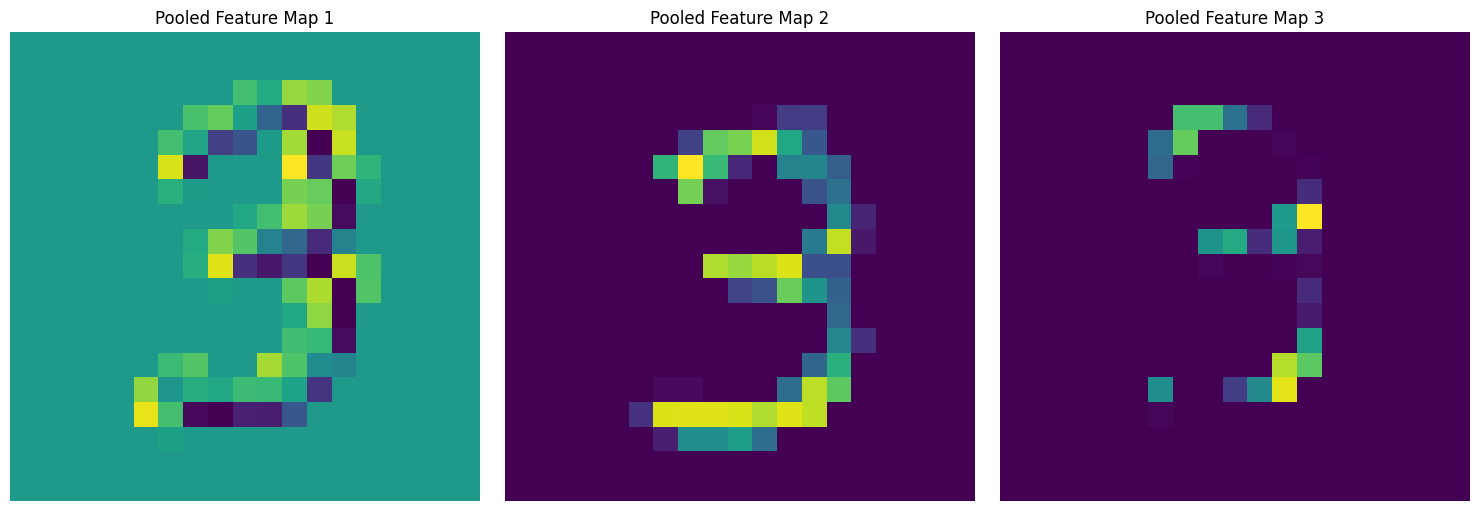

In [ ]:
# Convert to TensorFlow tensor
x = tf.convert_to_tensor(img_np)

# Define a Conv2D layer
conv_layer = layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='valid')

# Apply the convolutional layer to the input tensor
y = conv_layer(x)

# Define a MaxPool2D layer with pool size (3, 3) and strides (3, 3)
maxpool_layer = layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='valid')

# Apply the MaxPool2D layer
y_pooled = maxpool_layer(y)

# Convert tensors to numpy arrays for plotting
x_np = x.numpy().squeeze()  # Remove batch and channel dimensions
y_np = y.numpy().squeeze()  # Remove batch and channel dimensions
y_pooled_np = y_pooled.numpy().squeeze()  # Remove batch and channel dimensions

# Plotting the pooled feature maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each channel of the pooled feature maps
for i in range(y_pooled_np.shape[-1]):
    axes[i].imshow(y_pooled_np[:, :, i], cmap='viridis')
    axes[i].set_title(f'Pooled Feature Map {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## **Flatten Layer in CNN**

### What is `layers.Flatten()`?
The `Flatten` layer in TensorFlow and Keras is used to convert multi-dimensional input into a single, long, flat vector. This is particularly useful when transitioning from the convolutional layers, which operate in 2D or 3D space, to fully connected (dense) layers that expect 1D input.

### How does it work?
When you apply the `Flatten` layer to a tensor with shape `(batch_size, height, width, channels)`, it flattens the height, width, and channels into a single dimension, resulting in a tensor of shape `(batch_size, height * width * channels)`.

For example, a tensor with shape `(1, 4, 4, 3)` would be flattened into `(1, 48)`.

### Use in CNN Models
In Convolutional Neural Networks (CNNs), after several convolutional and pooling layers, the high-dimensional feature maps need to be flattened before passing them to fully connected layers. The fully connected layers can then use this flattened vector to perform the final classification or regression tasks.

### Example
1. **Input Tensor Shape:** `(1, 4, 4, 3)` (e.g., 4x4 image with 3 channels)
2. **Flattened Tensor Shape:** `(1, 48)` (all pixel values lined up in a single row)

The `Flatten` layer is essential for transforming the 2D spatial features captured by the convolutional layers into a 1D feature vector that can be fed into the dense layers for final prediction.


In [ ]:
# Create a test tensor of shape (1, 4, 4, 3) to represent a batch of images (batch_size, height, width, channels)
test_tensor = tf.random.uniform((1, 4, 4, 3), minval=0, maxval=10, dtype=tf.int32)

In [ ]:
test_tensor

<tf.Tensor: shape=(1, 4, 4, 3), dtype=int32, numpy=
array([[[[8, 3, 9],
         [4, 2, 3],
         [4, 2, 6],
         [4, 1, 3]],

        [[6, 0, 9],
         [9, 0, 1],
         [4, 7, 0],
         [8, 1, 6]],

        [[2, 4, 9],
         [9, 4, 8],
         [2, 1, 7],
         [3, 7, 5]],

        [[7, 6, 1],
         [4, 3, 5],
         [5, 9, 4],
         [8, 3, 1]]]], dtype=int32)>

Original shape: (1, 4, 4, 3)
Flattened shape: (1, 48)


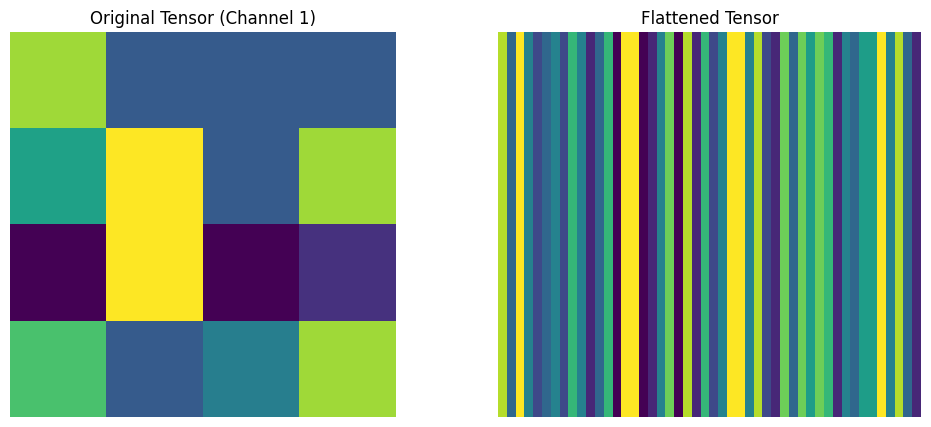

In [ ]:
# Create a Flatten layer
flatten_layer = tf.keras.layers.Flatten()

# Apply the Flatten layer to the test tensor
flattened_tensor = flatten_layer(test_tensor)

# Convert the original and flattened tensors to numpy arrays for easier visualization
original_np = test_tensor.numpy().squeeze()  # Remove batch dimension for visualization
flattened_np = flattened_tensor.numpy().squeeze()  # Remove batch dimension for visualization

# Print the shapes to verify the flattening
print(f"Original shape: {test_tensor.shape}")
print(f"Flattened shape: {flattened_tensor.shape}")

# Visualize the original tensor and the flattened tensor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original tensor (first channel for simplicity)
axes[0].imshow(original_np[:, :, 0], cmap='viridis')
axes[0].set_title('Original Tensor (Channel 1)')
axes[0].axis('off')

# Plot the flattened tensor (as a long row of pixels)
axes[1].imshow(flattened_np.reshape(1, -1), cmap='viridis', aspect='auto')
axes[1].set_title('Flattened Tensor')
axes[1].axis('off')

plt.show()

## Dense Layer in Neural Networks

### What is `layers.Dense()`?
The `Dense` layer in TensorFlow and Keras is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer. This is one of the most common layers used in neural networks.

### How does it work?
The `Dense` layer performs a linear transformation of the input data, followed by an activation function. The linear transformation involves multiplying the input by a weight matrix and then adding a bias vector. The activation function introduces non-linearity, allowing the network to learn complex patterns.

Mathematically, the output of a Dense layer is given by:

**Output = Activation Function (Input × Weights + Bias)**

### Use in Neural Networks
The `Dense` layer is used in various parts of a neural network:
- **Input Layer:** When the input data is first passed into the network.
- **Hidden Layers:** Intermediate layers where features are learned.
- **Output Layer:** Produces the final prediction (e.g., classification or regression).

### Example
Consider a Dense layer with 10 neurons and a ReLU activation function:
```python
from tensorflow.keras import layers

dense_layer = layers.Dense(units=10, activation='relu')


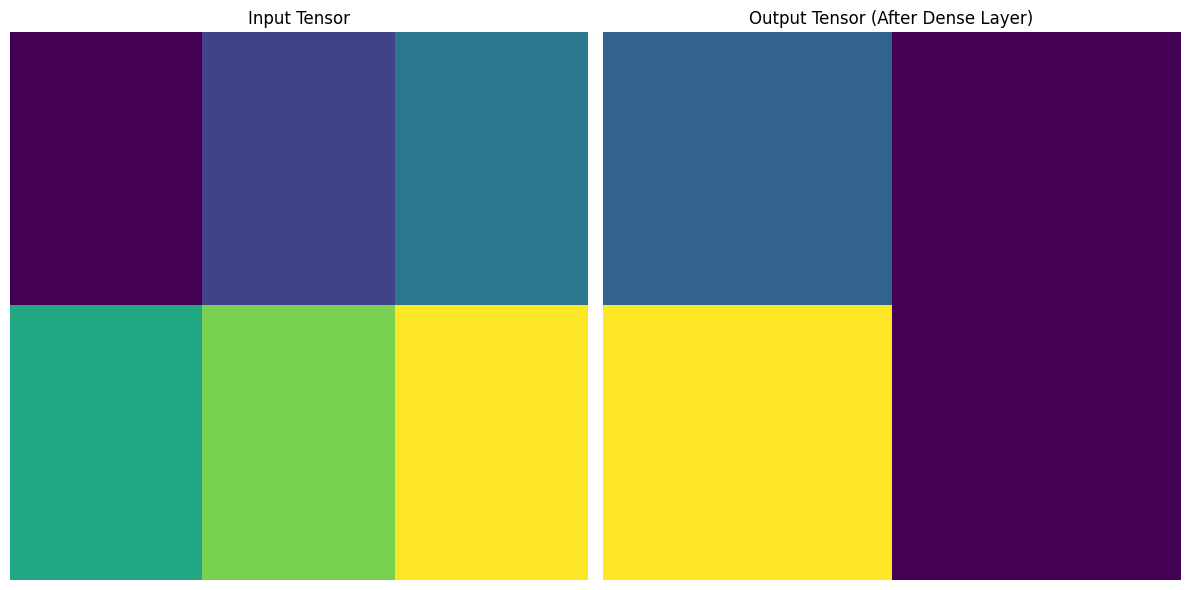

Input Tensor:
 [[1. 2. 3.]
 [4. 5. 6.]]
Weights:
 [[ 1.0059047  -0.96385217]
 [-0.00932181 -0.295147  ]
 [ 0.2626295   0.44250083]]
Biases:
 [0. 0.]
Manual Output Calculation:
 [[1.7751496 0.       ]
 [5.552787  0.       ]]
Output Tensor (TF):
 [[1.7751496 0.       ]
 [5.552787  0.       ]]


In [ ]:
# Step 1: Create a test tensor
input_tensor = tf.constant([[1.0, 2.0, 3.0],
                            [4.0, 5.0, 6.0]])

# Step 2: Define a Dense layer
dense_layer = layers.Dense(units=2, activation='relu')

# Apply the Dense layer to the input tensor
output_tensor = dense_layer(input_tensor)

# Extract weights and biases for manual calculation
weights, biases = dense_layer.get_weights()

# Convert tensors to numpy arrays for easy visualization
input_np = input_tensor.numpy()
output_np = output_tensor.numpy()

# Step 3: Visualizing the results

# Plotting the input and output tensors
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the input tensor
axes[0].imshow(input_np, cmap='viridis', aspect='auto')
axes[0].set_title('Input Tensor')
axes[0].axis('off')

# Plot the output tensor after applying the Dense layer
axes[1].imshow(output_np, cmap='viridis', aspect='auto')
axes[1].set_title('Output Tensor (After Dense Layer)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Manually calculate output (for understanding)
manual_output = np.dot(input_np, weights) + biases
manual_output = np.maximum(manual_output, 0)  # ReLU activation

print("Input Tensor:\n", input_np)
print("Weights:\n", weights)
print("Biases:\n", biases)
print("Manual Output Calculation:\n", manual_output)
print("Output Tensor (TF):\n", output_np)
